<a href="https://colab.research.google.com/github/chemprop/chemprop/blob/master/colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please note that this notebook is intended to be run in Google Colab rather than as a Jupyter notebook on your local machine. Please click the "Open in Colab" button.

# Setup

In [1]:
import os

!curl -L bit.ly/rdkit-colab | tar xz -C / # shortcut install of rdkit 2020.09.01 for Colab

!git clone https://github.com/chemprop/chemprop
os.chdir('chemprop')
!pip install -e .

import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

# You can safely ignore the following errors and do not need to restart the runtime; all subsequent cells should still execute without errors:

# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
# datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.

# WARNING: The following packages were previously imported in this runtime:
#   [sphinxcontrib]
# You must restart the runtime in order to use newly installed versions.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   1940      0 --:--:-- --:--:-- --:--:--  1917
100   133  100   133    0     0    747      0 --:--:-- --:--:-- --:--:--   747
100   651  100   651    0     0   2573      0 --:--:-- --:--:-- --:--:--  2573
100 29.6M  100 29.6M    0     0  17.9M      0  0:00:01  0:00:01 --:--:-- 19.7M
Cloning into 'chemprop'...
remote: Enumerating objects: 15722, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15722 (delta 7), reused 12 (delta 5), pack-reused 15705
Receiving objects: 100% (15722/15722), 360.39 MiB | 20.05 MiB/s, done.
Resolving deltas: 100% (7989/7989), done.
Obtaining file:///content/chemprop
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 7.8 MB/s 
     |████████████████████████

In [2]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    
    plt.show()
    
    return

# Train regression model

In [3]:
arguments = [
    '--data_path', 'tests/data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,


# Predict from file

In [4]:
arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 41282.52it/s]
100%|██████████| 50/50 [00:00<00:00, 104752.85it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:01


In [5]:
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,logSolubility,preds
0,C/C1CCC(\C)CC1,-4.470,-2.923179
1,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,-6.010,-2.800287
2,c1c(Br)ccc2ccccc12,-4.400,-4.282761
3,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,-8.600,-3.202824
4,CCC1(C(=O)NC(=O)NC1=O)C2=CCCCC2,-2.170,-2.961018
5,C(Cc1ccccc1)c2ccccc2,-4.620,-2.532373
6,Cc1cccc(N)c1,-0.850,-1.932497
7,CCN(CC(C)=C)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,-6.124,-4.090992
8,CC(C)O,0.430,0.151779
9,CCCCCCCCO,-2.390,-3.121081


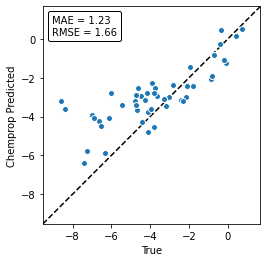

In [6]:
plot_parity(df.logSolubility, df.preds)

# Predict from SMILES list

In [7]:
smiles = [['CCC'], ['CCCC'], ['OCC']]
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args, smiles=smiles)

Loading training args


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:01


# Load model once, predict multiple times

In [8]:
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

smiles = [['CCC'], ['CCCC'], ['OCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

smiles = [['CCCC'], ['CCCCC'], ['COCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

Loading training args


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models


100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Saving predictions to /dev/null
Elapsed time = 0:00:00
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3
Predicting with an ensemble of 1 models


100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:00


# Reactions

In [9]:
reaction_reg_df = pd.read_csv('tests/data/reaction_regression.csv')
reaction_reg_df

,AAM,ea
0,[O:1]([C:2]([C:3]([C:4](=[O:5])[C:6]([O:7][H:1...,8.898934
1,[C:1]1([H:8])([H:9])[O:2][C@@:3]2([H:10])[C@@:...,5.464328
2,[C:1]([C@@:2]1([H:11])[C@@:3]2([H:12])[C:4]([H...,5.270552
3,[C:1]([O:2][C:3]([C@@:4]([C:5]([H:14])([H:15])...,8.473006
4,[C:1]([C:2]#[C:3][C:4]([C:5](=[O:6])[H:12])([H...,5.579037
...,...,...
495,[C:1]([c:2]1[c:3]([H:10])[n:4]([H:11])[n:5][c:...,14.662005
496,[C:1]([C@@:2]1([H:11])[N:3]([H:12])[C@:4]1([C:...,5.146017
497,[C:1]([C@@:2]1([H:10])[C:3]([H:11])([H:12])[C:...,8.362688
498,[C:1]([c:2]1[c:3]([H:11])[o:4][c:5]([O:6][H:12...,12.416359


In [10]:
arguments = [
    '--data_path', 'tests/data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reaction',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/reaction_regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solv

In [11]:
arguments = [
    '--test_path', 'test_checkpoints_reaction/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reaction.csv',
    '--checkpoint_dir', 'test_checkpoints_reaction'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 19145.08it/s]
100%|██████████| 50/50 [00:00<00:00, 40423.13it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

Saving predictions to test_preds_reaction.csv
Elapsed time = 0:00:02


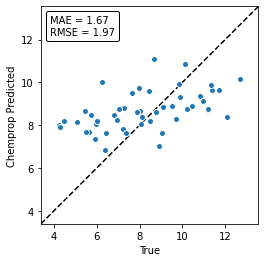

In [12]:
df = pd.read_csv('test_checkpoints_reaction/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.ea, df.preds)

# Multiple-Molecule Inputs

In [13]:
multimolecule_df = pd.read_csv('tests/data/classification_multimolecule.csv')
multimolecule_df

,mol a smiles,mol b Smiles,synergy
0,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,1
1,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C1CCC(C(O1)OC2C(CC(C(C2O)OC3C(C(C(CO3)(C)O)...,0
2,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C(=O)O)ON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=...,0
3,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C)NCC(=O)NC1=CC(=C2CC3CC4C(C(=O)C(=C(C4(...,1
4,C[C@H]([C@H]1C(=O)NCC[C@@H](C(=O)N[C@H](C(=O)N...,CN1C(=NC(=O)C(=O)N1)SCC2=C(N3C(C(C3=O)NC(=O)C(...,1
...,...,...,...
254,CC(C)CC1C(=O)NC(C(=O)N2CCCC2C(=O)NC(C(=O)NC(C(...,[N+](=O)([O-])[O-].[Ag+],0
255,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,C1=CC=C2C(=C1)C=CN2,1
256,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...,1
257,CCOP(=O)(O)OP(=O)(O)O,C1=CC(=CC=C1C(C(CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-],1


In [14]:
arguments = [
    '--data_path', 'tests/data/classification_multimolecule.csv',
    '--dataset_type', 'classification',
    '--save_dir', 'test_checkpoints_multimolecule',
    '--epochs', '5',
    '--save_smiles_splits',
    '--number_of_molecules', '2',
    '--split_key_molecule', '1' # defaults to 0 (1st column) if not specified
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/classification_multimolecule.csv',
 'data_weights_path': None,
 'dataset_type': 'classification',
 'depth': 3,

In [15]:
arguments = [
    '--test_path', 'test_checkpoints_multimolecule/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_multimolecule.csv',
    '--checkpoint_dir', 'test_checkpoints_multimolecule',
    '--number_of_molecules', '2',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


26it [00:00, 59689.06it/s]
100%|██████████| 26/26 [00:00<00:00, 50627.62it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 26
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

Saving predictions to test_preds_multimolecule.csv
Elapsed time = 0:00:01


# Split Type

In [16]:
arguments = [
    '--data_path', 'tests/data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_splits',
    '--epochs', '5',
    '--split_type', 'scaffold_balanced',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,


In [17]:
arguments = [
    '--test_path', 'test_checkpoints_splits/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_splits.csv',
    '--checkpoint_dir', 'test_checkpoints_splits',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 64686.98it/s]
100%|██████████| 50/50 [00:00<00:00, 109683.68it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Saving predictions to test_preds_splits.csv
Elapsed time = 0:00:01


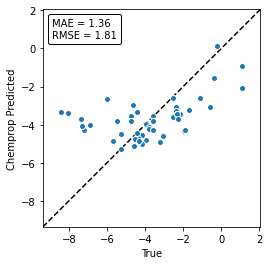

In [18]:
df = pd.read_csv('test_checkpoints_splits/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.logSolubility, df.preds)

# Ensembling and Uncertainty

In [19]:
arguments = [
    '--data_path', 'tests/data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_ensemble',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits',
    '--ensemble_size', '5',
    '--split_type', 'scaffold_balanced'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/reaction_regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solv

In [20]:
arguments = [
    '--test_path', 'test_checkpoints_ensemble/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_ensemble.csv',
    '--checkpoint_dir', 'test_checkpoints_ensemble',
    '--ensemble_variance'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 58514.29it/s]
100%|██████████| 50/50 [00:00<00:00, 104232.21it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 50
Predicting with an ensemble of 5 models


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 20%|██        | 1/5 [00:00<00:01,  2.05it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 40%|████      | 2/5 [00:00<00:01,  2.02it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 60%|██████    | 3/5 [00:01<00:00,  2.05it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 80%|████████  | 4/5 [00:01<00:00,  2.05it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

Saving predictions to test_preds_ensemble.csv
Elapsed time = 0:00:03


In [21]:
preds_df = pd.read_csv('test_preds_ensemble.csv')
preds_df

,AAM,ea,ea_epi_unc
0,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,7.437500,0.051191
1,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,8.662633,0.362828
2,[O:1]([C@@:2]1([H:9])[C:3]([H:10])([H:11])[N:4...,8.302808,0.073829
3,[O:1]([C:2]1([H:7])[C:3]([H:8])([H:9])[O:4][C:...,10.508875,0.356629
4,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,9.142585,0.174254
5,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,8.655645,0.116326
6,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,7.597202,0.044275
7,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,8.631742,0.175392
8,[O:1]=[C:2]1[C:3]([H:8])([H:9])[N:4]2[C:5]([H:...,9.267970,0.310400
9,[C:1]([c:2]1[c:3]([H:11])[n:4]([H:12])[c:5]([O...,8.703622,0.050446


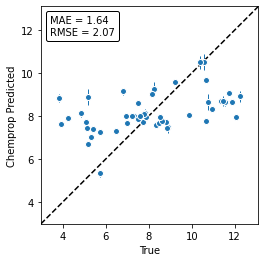

In [22]:
df = pd.read_csv('test_checkpoints_ensemble/fold_0/test_full.csv')
plot_parity(df.ea, preds_df.ea, preds_df.ea_ensemble_uncal_var)

# Fingerprint

In [23]:
arguments = [
    '--test_path', 'tests/data/regression.csv',
    '--preds_path', 'test_preds_fingerprint.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--fingerprint_type', 'MPN'
]

args = chemprop.args.FingerprintArgs().parse_args(arguments)
preds = chemprop.train.molecule_fingerprint.molecule_fingerprint(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


500it [00:00, 78074.23it/s]
100%|██████████| 500/500 [00:00<00:00, 99405.22it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 500
Encoding smiles into a fingerprint vector from 1 models.


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


Saving predictions to test_preds_fingerprint.csv
Elapsed time = 0:00:02


In [24]:
preds.squeeze().shape

(500, 300)

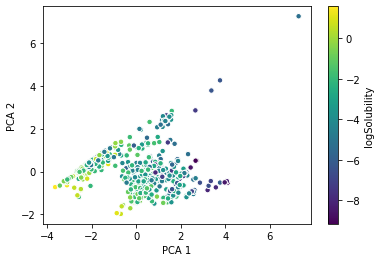

In [25]:
df = pd.read_csv('tests/data/regression.csv')

pca = PCA(n_components=2)
pca_xy = pca.fit_transform(preds.squeeze())
plt.scatter(pca_xy[:,0], pca_xy[:,1], s=30, c=df.logSolubility, edgecolor='w')
plt.colorbar(label='logSolubility')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Spectra

In [26]:
arguments = [
    '--data_path', 'tests/data/spectra.csv',
    '--dataset_type', 'spectra',
    '--save_dir', 'test_checkpoints_spectra',
    '--epochs', '5',
    '--features_path', 'tests/data/spectra_features.csv',
    '--split_type', 'random_with_repeated_smiles',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/spectra.csv',
 'data_weights_path': None,
 'dataset_type': 'spectra',
 'depth': 3,
 'depth_solvent': 3,
 'devi

In [27]:
arguments = [
    '--test_path', 'test_checkpoints_spectra/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_spectra.csv',
    '--checkpoint_dir', 'test_checkpoints_spectra',
    '--features_path', 'tests/data/spectra_features.csv'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


20it [00:00, 54436.13it/s]
100%|██████████| 20/20 [00:00<00:00, 24535.27it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 20
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

Saving predictions to test_preds_spectra.csv
Elapsed time = 0:00:01


# Pretraining / Transfer Learning

In [28]:
arguments = [
    '--data_path', 'tests/data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,


In [29]:
arguments = [
    '--data_path', 'tests/data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--checkpoint_frzn', 'test_checkpoints_transfer/fold_0/model_0/model.pt'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-bfa3852f-0b16-4879-895c-2ecd119e032c.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': 'test_checkpoints_transfer/fold_0/model_0/model.pt',
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'tests/data/regression.csv',
 'data_weights_path': None,
 'dataset_type': '

Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".


  0%|          | 0/5 [00:00<?, ?it/s]Epoch 0

 75%|███████▌  | 6/8 [00:00<00:00, 20.92it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.297117
 20%|██        | 1/5 [00:00<00:02,  1.82it/s]Epoch 1

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 3.4231e-01, PNorm = 34.0884, GNorm = 2.9127, lr_0 = 7.1875e-04

 75%|███████▌  | 6/8 [00:00<00:00, 21.47it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.315881
 40%|████      | 2/5 [00:01<00:01,  1.98it/s]Epoch 2

 25%|██▌       | 2/8 [00:00<00:00, 18.60it/s]Loss = 3.2340e-01, PNorm = 34.1108, GNorm = 2.3179, lr_0 = 6.1897e-04

 75%|███████▌  | 6/8 [00:00<00:00, 19.28it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.287416
 60%|██████    | 3/5 [00:01<00:01,  1.83

In [30]:
arguments = [
    '--test_path', 'test_checkpoints_transfer/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_transfer.csv',
    '--checkpoint_dir', 'test_checkpoints_transfer',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 16168.01it/s]
100%|██████████| 50/50 [00:00<00:00, 97723.77it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validating SMILES
Test size = 50
Predicting with an ensemble of 1 models


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Saving predictions to test_preds_transfer.csv
Elapsed time = 0:00:01
